<a href="https://colab.research.google.com/github/Zishaanuddin/Hello-World/blob/master/Credit_Card_Lead_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from tqdm import tqdm
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
import scipy.sparse
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
pip install autoviz --upgrade --quiet

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class


AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (245725, 11)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Since Number of Rows in data 245725 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 6


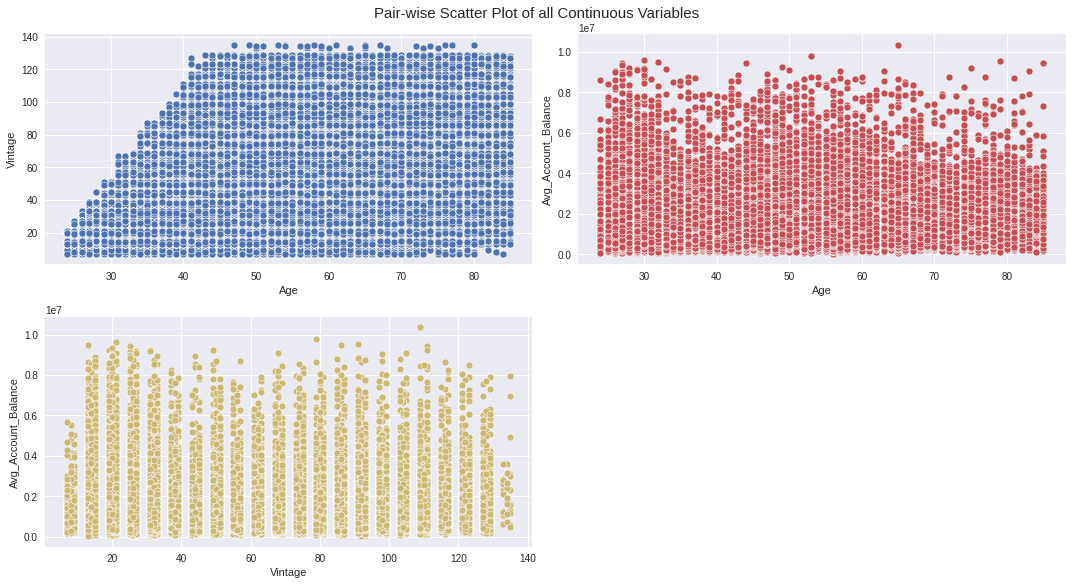

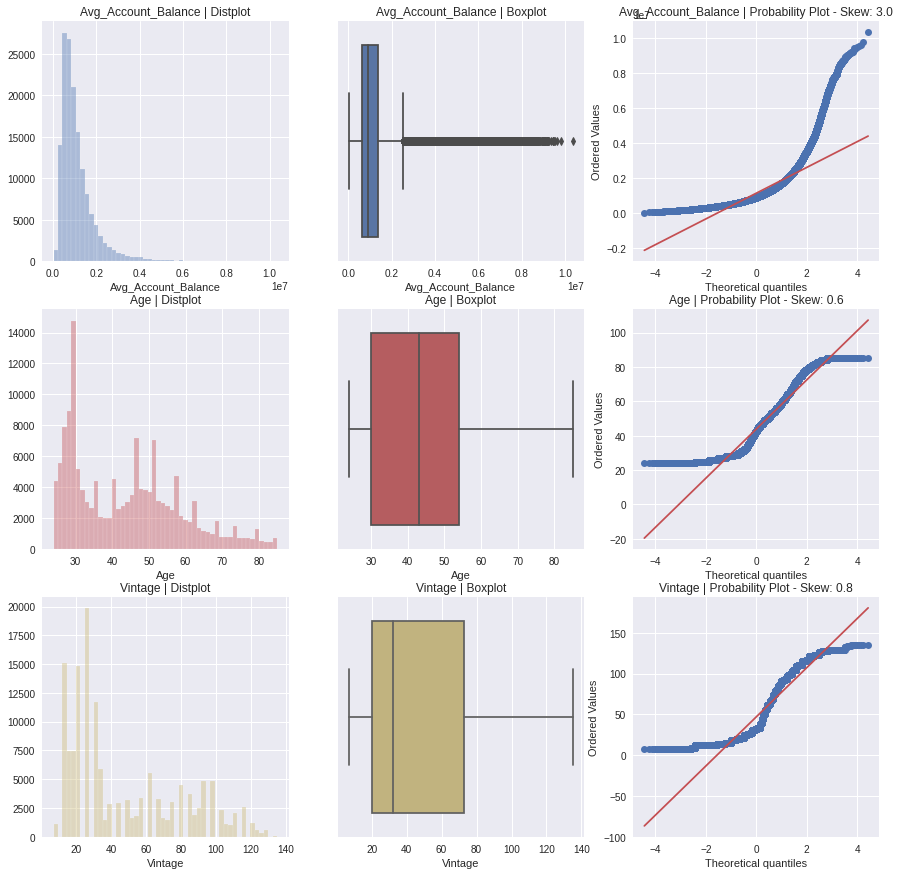

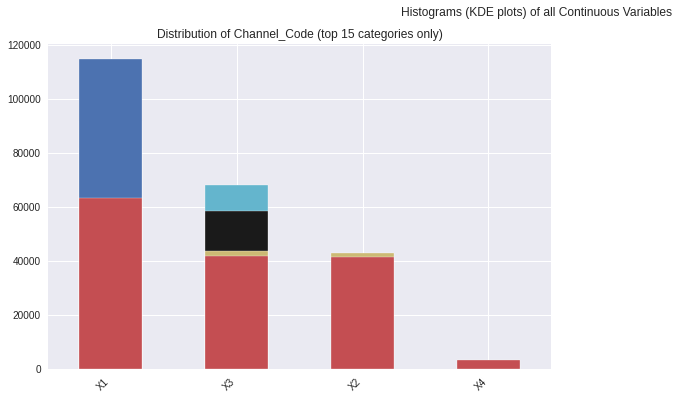

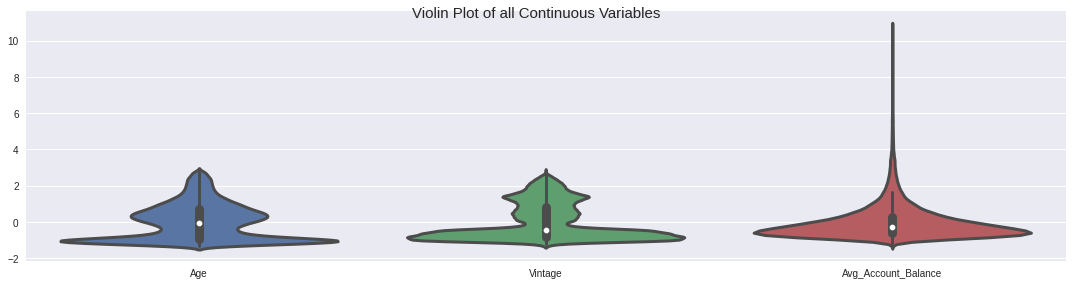

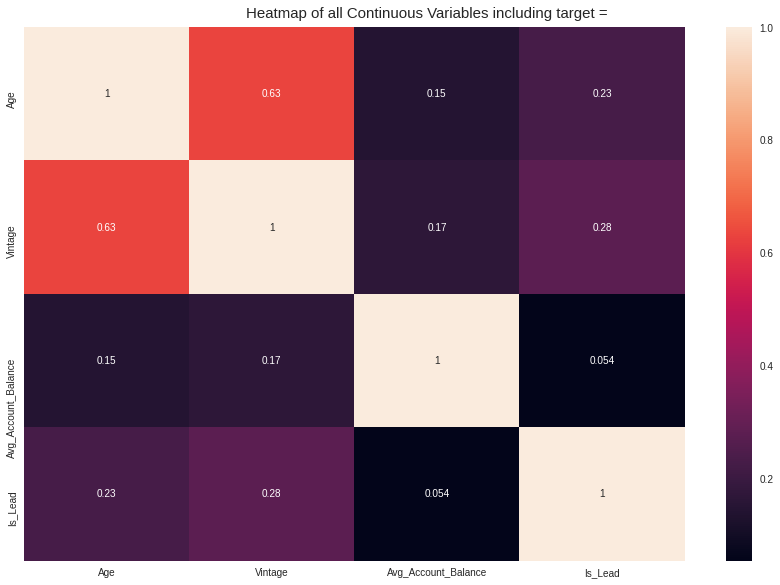

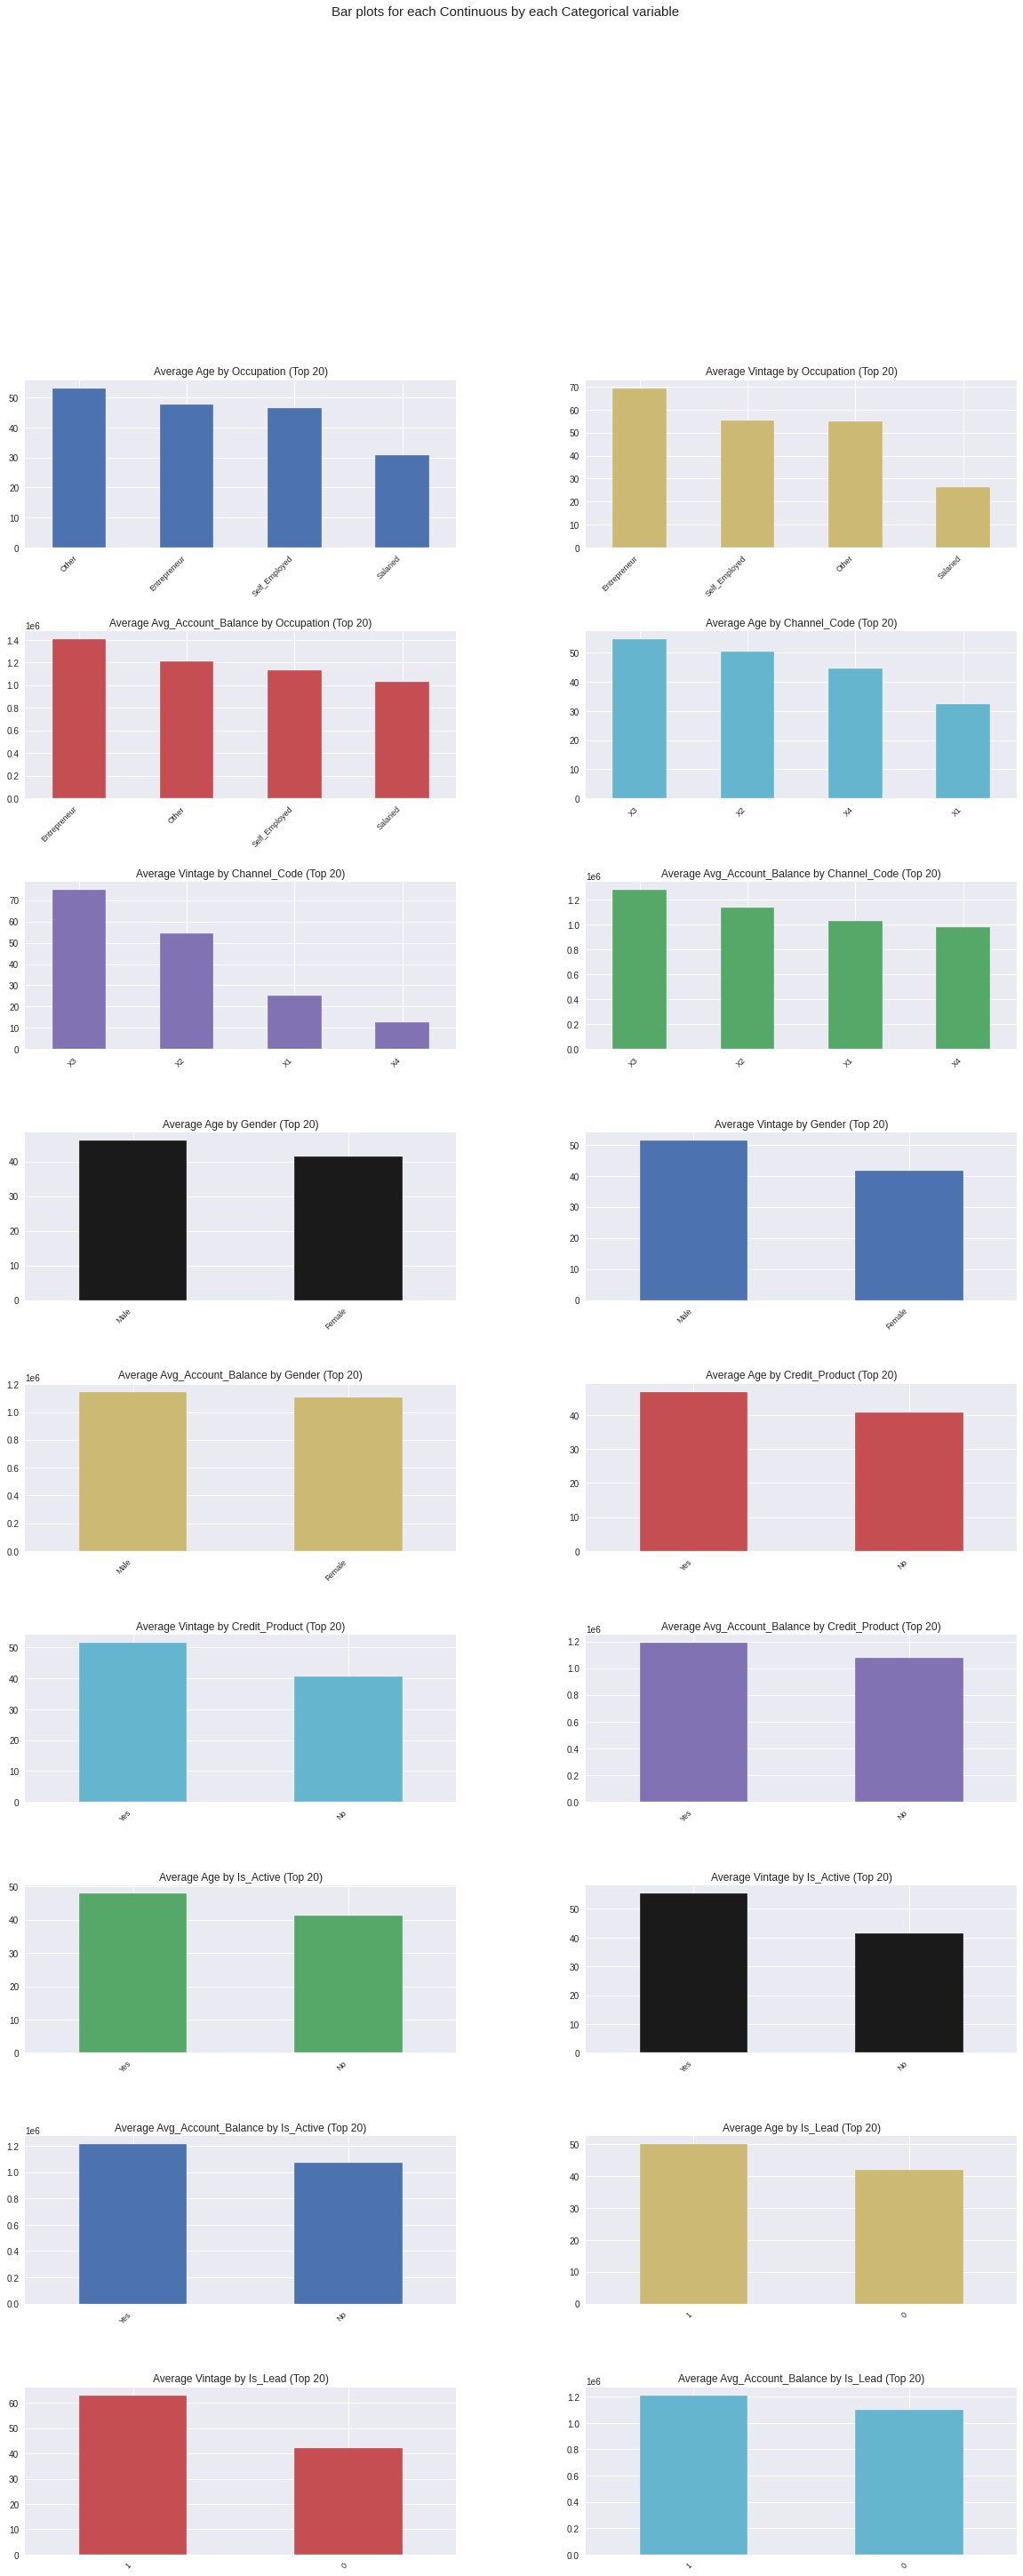

Time to run AutoViz (in seconds) = 15.115

 ###################### VISUALIZATION Completed ########################


In [ ]:
filename = '/content/train_s3TEQDk.csv'
sep = ","
dft = AV.AutoViz(filename, sep=",", depVar="", header=0, verbose=0, lowess=False, chart_format="svg")

In [3]:
train_data = pd.read_csv('/content/train_s3TEQDk.csv')
test_data = pd.read_csv('/content/test_mSzZ8RL.csv')

In [4]:
print("{0} is the shape of the train data and {1} is the shape of test data".format(train_data.shape, test_data.shape))

(245725, 11) is the shape of the train data and (105312, 10) is the shape of test data


In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB
None


In [5]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB
None


In [7]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [8]:
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


### Droping ID from the Test & Train Dataset 

In [5]:
train_data = train_data.drop(['ID'], axis=1)

In [6]:
test_data_ids = test_data['ID']

In [7]:
test_data = test_data.drop(['ID'], axis=1)

### Let Check the NaN values in our feature:

In [10]:
# Here we will check the percentage of nan values present in each feature
feature_with_nan = [ feature for feature in train_data.columns if train_data[feature].isnull().sum() > 0]

for feat in feature_with_nan:
  print(feat, np.round(train_data[feat].isnull().mean(), 4), "% missing values")

Credit_Product 0.1193 % missing values


In [11]:
feature_with_nan_test = [ feature for feature in test_data.columns if train_data[feature].isnull().sum() > 1]

for feat in feature_with_nan_test:
  print(feat, np.round(test_data[feat].isnull().mean(), 4), "% missing values")

Credit_Product 0.1189 % missing values


### Since they are many missing values in Credit_Product, we need to find the relationship between missing values and Is_Lead
Let's plot some diagram for this relationship

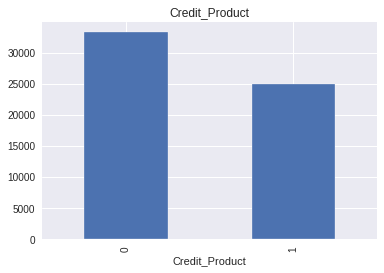

In [ ]:
for feature in feature_with_nan:
    data = train_data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the counts where the information is missing or present
    data.groupby(feature)['Is_Lead'].sum().plot.bar()
    plt.title(feature)
    plt.show()

### Since NaN value has relation ship with results. We are using missing as a category

In [8]:
train_data['Credit_Product'] = train_data['Credit_Product'].fillna('missing')

In [9]:
test_data['Credit_Product'] = test_data['Credit_Product'].fillna('missing')

In [14]:
train_data = train_data.dropna()
test_data = test_data.dropna()

### numerical_features in our dataset

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train_data[numerical_features].head()

Number of numerical variables:  4


,Age,Vintage,Avg_Account_Balance,Is_Lead
0,73,43,1045696,0
1,30,32,581988,0
2,56,26,1484315,0
3,34,19,470454,0
4,30,33,886787,0


### EDA of Numerical Feature.

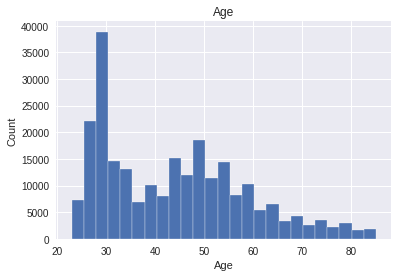

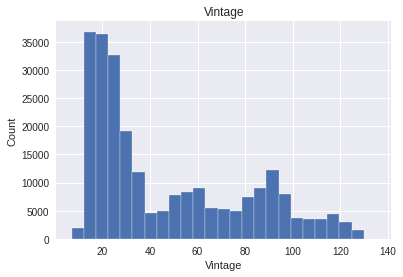

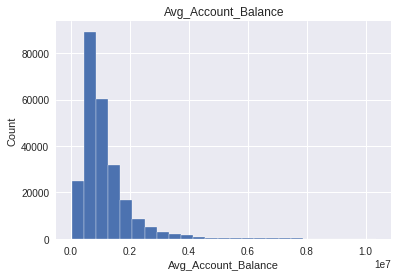

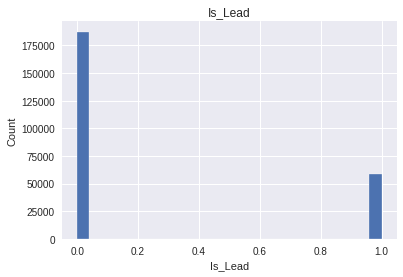

In [ ]:
for feature in train_data[numerical_features]:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Creating new feature with binning the numerical feature.

In [10]:

binned = pd.cut(train_data["Age"], bins = [0,30,50,100], labels = ["young","middle","older"])

# Add the binned values as a new categorical feature
train_data["Age_binned"] = binned

binned_test = pd.cut(test_data["Age"], bins = [0,30,50,100], labels = ["young","middle","older"])

# Add the binned values as a new categorical feature
test_data["Age_binned"] = binned_test

In [11]:
binned = pd.cut(train_data["Vintage"], bins = [0,12,60,200], labels = ["New","Trust","Faith"])

# Add the binned values as a new categorical feature
train_data["Vintage_binned"] = binned

binned_test = pd.cut(test_data["Vintage"], bins = [0,12,60,200], labels = ["New","Trust","Faith"])

# Add the binned values as a new categorical feature
test_data["Vintage_binned"] = binned_test

In [12]:

binned = pd.cut(train_data["Avg_Account_Balance"], bins = [0, 200000, 500000, 900000, 1500000, 500000000], labels = ["Lower","middle","mid-upper", "upper", "rich" ])

# Add the binned values as a new categorical feature
train_data["Avg_Account_Balance_binned"] = binned

binned_test = pd.cut(test_data["Vintage"], bins = [0, 200000, 500000, 900000, 1500000, 5000000], labels = ["Lower","middle","mid-upper", "upper", "rich" ])

# Add the binned values as a new categorical feature
test_data["Avg_Account_Balance_binned"] = binned_test

### Categorical Feature:

In [ ]:
# list of categorical variables
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']

print('Number of Categorical variables: ', len(categorical_features))

# visualise the categorical variables
train_data[categorical_features].head()

Number of numerical variables:  6


,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,Female,RG268,Other,X3,No,No
1,Female,RG277,Salaried,X1,No,No
2,Female,RG268,Self_Employed,X3,No,Yes
3,Male,RG270,Salaried,X1,No,No
4,Female,RG282,Salaried,X1,No,No


### EDA for Categorical Feature

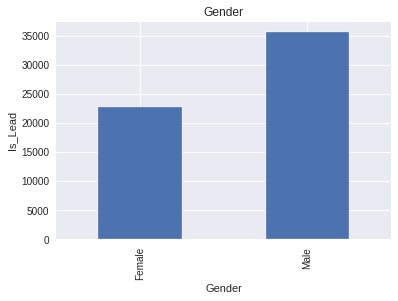

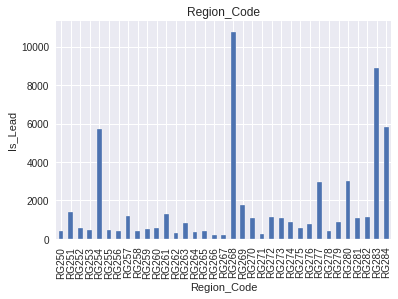

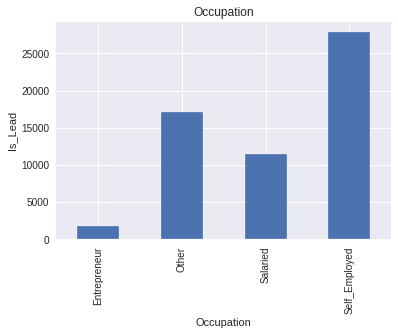

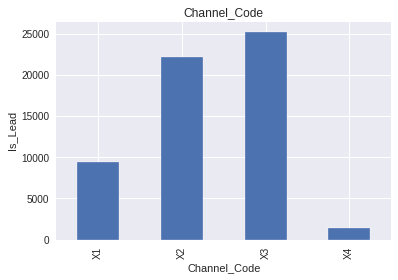

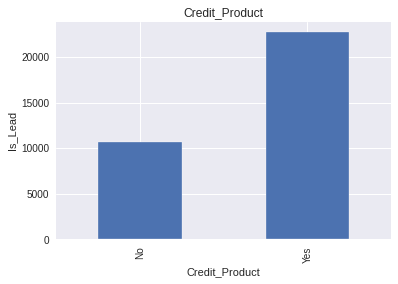

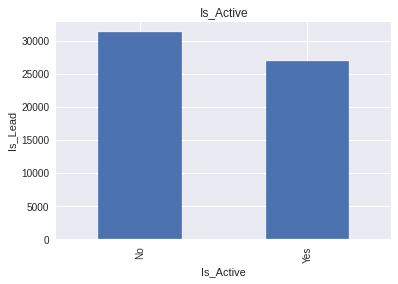

In [ ]:
for feature in categorical_features:
    data=train_data.copy()
    data.groupby(feature)['Is_Lead'].sum().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Is_Lead')
    plt.title(feature)
    plt.show()

### CHecking NaN if any 

In [ ]:
for col in train_data.columns:
  print(col, train_data[col].isnull().sum())

Gender 0
Age 0
Region_Code 0
Occupation 0
Channel_Code 0
Vintage 0
Credit_Product 0
Avg_Account_Balance 0
Is_Active 0
Is_Lead 0


### Feature Engineering

In [13]:
# converting Ages into months as because vintage in also in month.

train_data['Age'] = train_data['Age'] * 12

In [14]:
# creating a ratio feature between account balance and account holder age

train_data['account_balance_age_ratio'] = train_data['Avg_Account_Balance'] / train_data['Age']

In [16]:
# creating a ratio feature between account balance and account vintage 

train_data['account_balance_vinatge_ratio'] = train_data['Avg_Account_Balance'] / train_data['Vintage']

In [17]:
# creating a ratio feature between account holder age and vintage

train_data['age_vinatge_ratio'] = train_data['Age'] / train_data['Vintage']

In [18]:
# checking the new train dataset
train_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_binned,Vintage_binned,Avg_Account_Balance_binned,account_balance_age_ratio,account_balance_vinatge_ratio,age_vinatge_ratio
0,Female,876,RG268,Other,X3,43,No,1045696,No,0,older,Trust,upper,1193.716895,24318.511628,20.372093
1,Female,360,RG277,Salaried,X1,32,No,581988,No,0,young,Trust,mid-upper,1616.633333,18187.125000,11.250000
2,Female,672,RG268,Self_Employed,X3,26,No,1484315,Yes,0,older,Trust,upper,2208.802083,57089.038462,25.846154
3,Male,408,RG270,Salaried,X1,19,No,470454,No,0,middle,Trust,middle,1153.073529,24760.736842,21.473684
4,Female,360,RG282,Salaried,X1,33,No,886787,No,0,young,Trust,mid-upper,2463.297222,26872.333333,10.909091


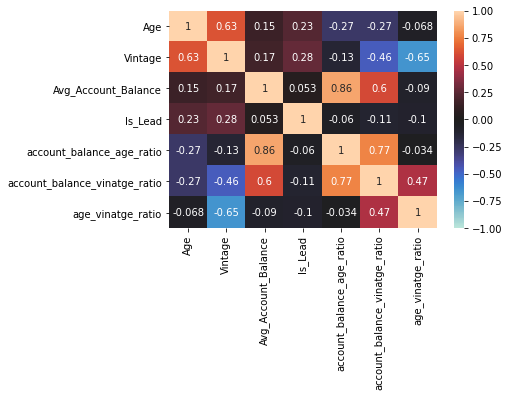

In [19]:
# plotting the Correlation Heatmap to analyse the correlation between feature

sns.heatmap(train_data.corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [20]:
# converting Ages into months as because vintage in also in month.

test_data['Age'] = test_data['Age'] * 12

In [21]:
# creating a ratio feature between account balance and account holder age

test_data['account_balance_age_ratio'] = test_data['Avg_Account_Balance'] / test_data['Age']

In [22]:
# creating a ratio feature between account balance and account vintage 

test_data['account_balance_vinatge_ratio'] = test_data['Avg_Account_Balance'] / test_data['Vintage']

In [23]:
# creating a ratio feature between account holder age and vintage

test_data['age_vinatge_ratio'] = test_data['Age'] / test_data['Vintage']

In [24]:
y_train = train_data['Is_Lead']
X_train = train_data.drop(['Is_Lead'], axis=1)

In [25]:
X_test = test_data

### One Hot Encoding: GENDER

In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Gender'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Gender_ohe = vectorizer.transform(X_train['Gender'].values)
X_test_Gender_ohe = vectorizer.transform(X_test['Gender'].values)

print("="*100)
print("After vectorizations")
print(X_train_Gender_ohe.shape, y_train.shape)
print(X_test_Gender_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(245725, 2) (245725,)
(105312, 2)
['female', 'male']


### One Hot Encoding: REGION_CODE

In [27]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Region_Code'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Region_Code_ohe = vectorizer.transform(X_train['Region_Code'].values)
X_test_Region_Code_ohe = vectorizer.transform(X_test['Region_Code'].values)

print("="*100)
print("After vectorizations")
print(X_train_Region_Code_ohe.shape, y_train.shape)
print(X_test_Region_Code_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(245725, 35) (245725,)
(105312, 35)
['rg250', 'rg251', 'rg252', 'rg253', 'rg254', 'rg255', 'rg256', 'rg257', 'rg258', 'rg259', 'rg260', 'rg261', 'rg262', 'rg263', 'rg264', 'rg265', 'rg266', 'rg267', 'rg268', 'rg269', 'rg270', 'rg271', 'rg272', 'rg273', 'rg274', 'rg275', 'rg276', 'rg277', 'rg278', 'rg279', 'rg280', 'rg281', 'rg282', 'rg283', 'rg284']


### One Hot Encoding: CHANNEL_CODE

In [28]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Channel_Code'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Channel_Code_ohe = vectorizer.transform(X_train['Channel_Code'].values)
X_test_Channel_Code_ohe = vectorizer.transform(X_test['Channel_Code'].values)

print("="*100)
print("After vectorizations")
print(X_train_Channel_Code_ohe.shape, y_train.shape)
print(X_test_Channel_Code_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(245725, 4) (245725,)
(105312, 4)
['x1', 'x2', 'x3', 'x4']


### One Hot Encoding: OCCUPATION

In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Occupation'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Occupation_ohe = vectorizer.transform(X_train['Occupation'].values)
X_test_Occupation_ohe = vectorizer.transform(X_test['Occupation'].values)

print("="*100)
print("After vectorizations")
print(X_train_Occupation_ohe.shape, y_train.shape)
print(X_test_Occupation_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(245725, 4) (245725,)
(105312, 4)
['entrepreneur', 'other', 'salaried', 'self_employed']


### One Hot Encoding: CREDICT_PRODUCT

In [30]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Credit_Product'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Credit_Product_ohe = vectorizer.transform(X_train['Credit_Product'].values)
X_test_Credit_Product_ohe = vectorizer.transform(X_test['Credit_Product'].values)

print("="*100)
print("After vectorizations")
print(X_train_Credit_Product_ohe.shape, y_train.shape)
print(X_test_Credit_Product_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(245725, 3) (245725,)
(105312, 3)
['missing', 'no', 'yes']


### One Hot Encoding: IS_ACTIVE

In [31]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Is_Active'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Is_Active_ohe = vectorizer.transform(X_train['Is_Active'].values)
X_test_Is_Active_ohe = vectorizer.transform(X_test['Is_Active'].values)

print("="*100)
print("After vectorizations")
print(X_train_Is_Active_ohe.shape, y_train.shape)
print(X_test_Is_Active_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(245725, 2) (245725,)
(105312, 2)
['no', 'yes']


### One Hot Encoding: AGE BINNED

In [32]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Age_binned'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Age_binned_ohe = vectorizer.transform(X_train['Age_binned'].values)
X_test_Age_binned_ohe = vectorizer.transform(X_test['Age_binned'].values)

print("="*100)
print("After vectorizations")
print(X_train_Age_binned_ohe.shape, y_train.shape)
print(X_test_Age_binned_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(245725, 3) (245725,)
(105312, 3)
['middle', 'older', 'young']


### One Hot Encoding: VINTAGE_BINNED

In [33]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Vintage_binned'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Vintage_binned_ohe = vectorizer.transform(X_train['Vintage_binned'].values)
X_test_Vintage_binned_ohe = vectorizer.transform(X_test['Vintage_binned'].values)

print("="*100)
print("After vectorizations")
print(X_train_Vintage_binned_ohe.shape, y_train.shape)
print(X_test_Vintage_binned_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(245725, 3) (245725,)
(105312, 3)
['faith', 'new', 'trust']


### One Hot Encoding: AVERAGE_ACCOUNT_BALANCE_BINNED

In [34]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Avg_Account_Balance_binned'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Avg_Account_Balance_binned_ohe = vectorizer.transform(X_train['Avg_Account_Balance_binned'].values)
X_test_Avg_Account_Balance_binned_ohe = vectorizer.transform(X_test['Avg_Account_Balance_binned'].values)

print("="*100)
print("After vectorizations")
print(X_train_Avg_Account_Balance_binned_ohe.shape, y_train.shape)
print(X_test_Avg_Account_Balance_binned_ohe.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(245725, 5) (245725,)
(105312, 5)
['lower', 'mid', 'middle', 'rich', 'upper']


### STANDARDIZATION: AGE

In [35]:

standardizer = MinMaxScaler()

standardizer.fit(X_train['Age'].values.reshape(-1,1))

X_train_Age_norm = standardizer.transform(X_train['Age'].values.reshape(-1,1))
X_test_Age_norm = standardizer.transform(X_test['Age'].values.reshape(-1,1))


print("="*100)
print("After vectorizations")
print(X_train_Age_norm.shape, y_train.shape)
print(X_test_Age_norm.shape)
print("="*100)

After vectorizations
(245725, 1) (245725,)
(105312, 1)


### STANDARDIZATION: VINTAGE

In [36]:
standardizerr = MinMaxScaler()

standardizer.fit(X_train['Vintage'].values.reshape(-1,1))

X_train_Vintage_norm = standardizer.transform(X_train['Vintage'].values.reshape(-1,1))
X_test_Vintage_norm = standardizer.transform(X_test['Vintage'].values.reshape(-1,1))


print("="*100)
print("After vectorizations")
print(X_train_Vintage_norm.shape, y_train.shape)
print(X_test_Vintage_norm.shape)
print("="*100)

After vectorizations
(245725, 1) (245725,)
(105312, 1)


### STANDARDIZATION: AVERAGE_ACCOUNT_BALANCE

In [37]:
standardizer = MinMaxScaler()

standardizer.fit(X_train['Avg_Account_Balance'].values.reshape(-1,1))

X_train_Avg_Account_Balance_norm = standardizer.transform(X_train['Avg_Account_Balance'].values.reshape(-1,1))
X_test_Avg_Account_Balance_norm = standardizer.transform(X_test['Avg_Account_Balance'].values.reshape(-1,1))


print("="*100)
print("After vectorizations")
print(X_train_Avg_Account_Balance_norm.shape, y_train.shape)
print(X_test_Avg_Account_Balance_norm.shape)
print("="*100)

After vectorizations
(245725, 1) (245725,)
(105312, 1)


### STANDARDIZATION: ACCOUNT_BALANCE_AGE_RATIO

In [38]:

standardizer = MinMaxScaler()

standardizer.fit(X_train['account_balance_age_ratio'].values.reshape(-1,1))

X_train_account_balance_age_ratio = standardizer.transform(X_train['account_balance_age_ratio'].values.reshape(-1,1))
X_test_account_balance_age_ratio = standardizer.transform(X_test['account_balance_age_ratio'].values.reshape(-1,1))


print("="*100)
print("After vectorizations")
print(X_train_account_balance_age_ratio.shape, y_train.shape)
print(X_test_account_balance_age_ratio.shape)
print("="*100)

After vectorizations
(245725, 1) (245725,)
(105312, 1)


### STANDARDIZATION: ACCOUNT_BALANCE_VINTAGE_RATIO

In [39]:

standardizer = MinMaxScaler()

standardizer.fit(X_train['account_balance_vinatge_ratio'].values.reshape(-1,1))

X_train_account_balance_vinatge_ratio = standardizer.transform(X_train['account_balance_vinatge_ratio'].values.reshape(-1,1))
X_test_account_balance_vinatge_ratio = standardizer.transform(X_test['account_balance_vinatge_ratio'].values.reshape(-1,1))


print("="*100)
print("After vectorizations")
print(X_train_account_balance_vinatge_ratio.shape, y_train.shape)
print(X_test_account_balance_vinatge_ratio.shape)
print("="*100)

After vectorizations
(245725, 1) (245725,)
(105312, 1)


### STANDARDIZATION: AGE_VINTAGE_RATIO

In [40]:

standardizer = MinMaxScaler()

standardizer.fit(X_train['age_vinatge_ratio'].values.reshape(-1,1))

X_train_age_vinatge_ratio = standardizer.transform(X_train['age_vinatge_ratio'].values.reshape(-1,1))
X_test_age_vinatge_ratio = standardizer.transform(X_test['age_vinatge_ratio'].values.reshape(-1,1))


print("="*100)
print("After vectorizations")
print(X_train_age_vinatge_ratio.shape, y_train.shape)
print(X_test_age_vinatge_ratio.shape)
print("="*100)

After vectorizations
(245725, 1) (245725,)
(105312, 1)


In [41]:
from scipy.sparse import hstack

X_train = hstack((X_train_Gender_ohe, X_train_Region_Code_ohe, X_train_Channel_Code_ohe, X_train_Occupation_ohe.shape, X_train_Credit_Product_ohe, \
                  X_train_Is_Active_ohe, X_train_Age_binned_ohe, X_train_Vintage_binned_ohe, X_train_Avg_Account_Balance_binned_ohe, X_train_Age_norm, X_train_Avg_Account_Balance_norm, X_train_Vintage_norm, X_train_account_balance_age_ratio,\
                  X_train_account_balance_vinatge_ratio, X_train_age_vinatge_ratio)).tocsr()

X_test = hstack((X_test_Gender_ohe, X_test_Region_Code_ohe, X_test_Channel_Code_ohe, X_test_Occupation_ohe.shape, X_test_Credit_Product_ohe, \
                  X_test_Is_Active_ohe, X_test_Age_binned_ohe, X_test_Vintage_binned_ohe, X_test_Avg_Account_Balance_binned_ohe, X_test_Age_norm, X_test_Avg_Account_Balance_norm, X_test_Vintage_norm, X_test_account_balance_age_ratio,\
                 X_test_account_balance_vinatge_ratio, X_test_age_vinatge_ratio)).tocsr()


print("Final Data matrix for Modeling")

print("="*50)
print(X_train.shape, y_train.shape)
print(X_test.shape, )
print("="*50)

Final Data matrix for TFIDF set
(245725, 67) (245725,)
(105312, 67)


In [60]:
#X_train = X_train.toarray()

In [61]:
#X_test = X_test.toarray()

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [54]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
     'n_estimators':[100, 250, 500, 750, 1000],
     'max_depth':[3,5,8,10],
    'colsample_bytree' : [0.6, 0.75, 1],
    'subsample': [0.6, 0.75, 1]
}

kfold = KFold(n_splits=10, random_state=7)

random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams, cv=kfold, scoring='roc_auc', return_train_score=True, verbose=10,n_jobs=-1,)
random_cfl.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 71.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 85.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 94.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 113.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 131.3min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logist...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample

In [55]:
print (random_cfl.best_params_)
print (random_cfl.best_score_)

{'subsample': 0.75, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.75}
0.8647493765158114


In [56]:
x_cfl=XGBClassifier(subsample = 0.75, n_estimators= 250, max_depth= 5, learning_rate= 0.05, colsample_bytree=0.75, n_jobs=-1)
x_cfl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

In [66]:
y_pred = x_cfl.predict_proba(X_test)

In [68]:
y_pred = y_pred[:,1]

In [69]:
submission_test_01 = pd.DataFrame(columns=['ID', 'Is_Lead'])

In [70]:
submission_test_01['ID'], submission_test_01['Is_Lead'] = test_data_ids, y_pred

In [71]:
submission_test_01.shape

(105312, 2)

In [72]:
submission_test_01.to_csv('submission_test_01.csv', index=False)